In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


sns.set(style="whitegrid")


In [2]:
import pandas as pd

rnaseq = pd.read_csv("../data/processed/rnaseq_normalized.csv", index_col=0)
metabo = pd.read_csv("../data/processed/metabolomics_preprocessed.csv", index_col=0)

print("RNA-seq:", rnaseq.shape)
print("Metabo:", metabo.shape)
print("RNA-seq index (samples):", rnaseq.index[:5])
print("Metabo index (samples):", metabo.index[:5])


RNA-seq: (1095, 60660)
Metabo: (100, 100)
RNA-seq index (samples): Index(['TCGA-D8-A146', 'TCGA-AQ-A0Y5', 'TCGA-C8-A274', 'TCGA-BH-A0BD',
       'TCGA-B6-A1KC'],
      dtype='object', name='0')
Metabo index (samples): Index(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5'], dtype='object', name='sample_id')


In [3]:
df = pd.read_csv("../data/processed/integrated_dataset.csv", index_col=0)
df.head()


,ENSG00000000003.15_rna,ENSG00000000005.6_rna,ENSG00000000419.13_rna,ENSG00000000457.14_rna,ENSG00000000460.17_rna,ENSG00000000938.13_rna,ENSG00000000971.16_rna,ENSG00000001036.14_rna,ENSG00000001084.13_rna,ENSG00000001167.14_rna,...,ENSG00000288663.1_rna,ENSG00000288665.1_rna,ENSG00000288667.1_rna,ENSG00000288669.1_rna,ENSG00000288670.1_rna,ENSG00000288671.1_rna,ENSG00000288674.1_rna,ENSG00000288675.1_rna,sex_male,outcome
0,,,,,,,,,,,,,,,,,,,,,
TCGA-D8-A146,0.309221,1.347436,-0.343758,0.641963,-0.383769,0.089526,0.397771,-0.543533,0.339589,0.064546,...,0.277667,NaN,-0.198192,-0.232972,-0.778085,NaN,-0.456878,-0.113546,False,1
TCGA-AQ-A0Y5,-1.496665,-0.455431,0.352094,0.243273,-0.775835,-1.017949,0.485642,1.095045,0.017893,0.084339,...,-0.833168,NaN,-0.198192,-0.232972,1.431648,NaN,-0.423128,0.199120,False,0
TCGA-C8-A274,1.414094,-0.618575,-0.092766,2.253046,1.709415,-1.159318,-1.261161,-1.006040,-0.902325,0.584821,...,-0.003076,NaN,-0.198192,-0.232972,1.382616,NaN,0.290924,-0.709236,False,1
TCGA-BH-A0BD,-0.483808,0.579011,-0.921214,0.789673,1.778369,-0.286629,0.263891,-0.392647,-0.691643,-0.035362,...,-0.624901,NaN,0.583723,-0.232972,1.226291,NaN,-0.364097,-0.828457,False,1
TCGA-B6-A1KC,-0.528458,-0.410746,-0.473065,0.141732,0.003302,-1.423806,-0.265114,-0.217974,-0.567471,1.293245,...,0.609613,NaN,-0.198192,-0.232972,2.918831,NaN,-0.795117,-0.839401,False,1


In [4]:
df = pd.read_csv("../data/processed/integrated_dataset.csv", index_col=0)
print(df.shape)

(1094, 60662)


Class distribution:
outcome
1    942
0    152
Name: count, dtype: int64


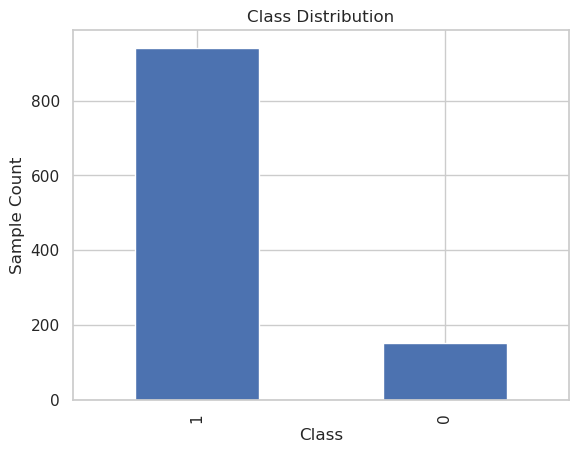

In [5]:
# Add outcome if missing
if 'outcome' not in df.columns or df['outcome'].isna().all():
    np.random.seed(0)
    df['outcome'] = np.random.choice(['Healthy', 'Diseased'], size=len(df))

# Show class distribution
print("Class distribution:")
print(df['outcome'].value_counts())

# Plot class distribution
df['outcome'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Sample Count")
plt.show()


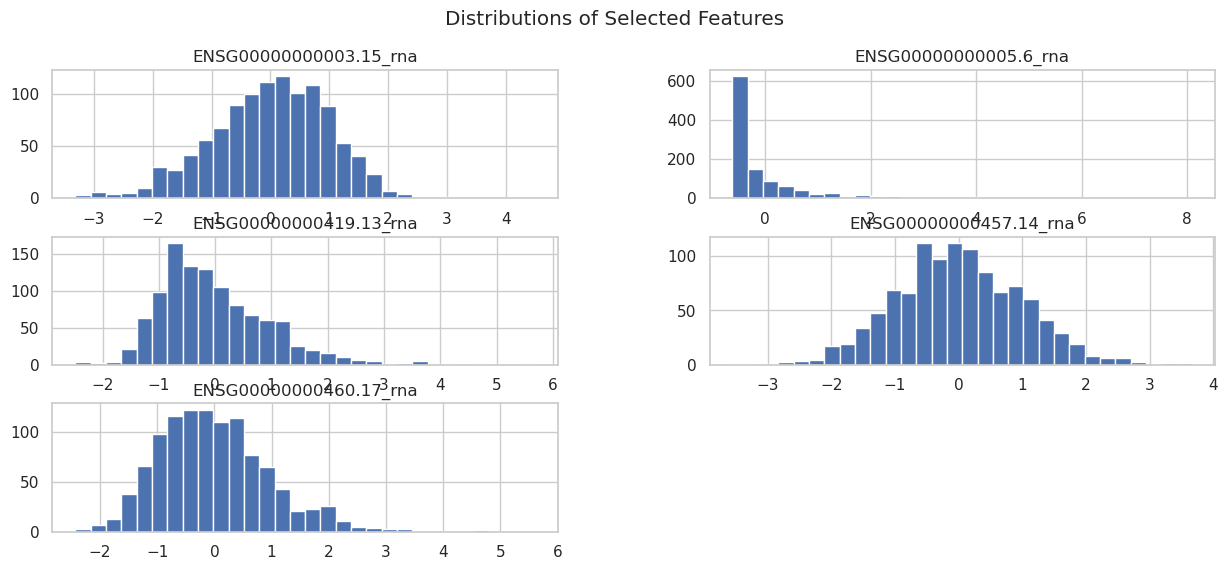

In [6]:
# Plot distributions of first 5 numerical features
cols_to_plot = df.select_dtypes(include=np.number).columns[:5]

df[cols_to_plot].hist(bins=30, figsize=(15, 6))
plt.suptitle("Distributions of Selected Features")
plt.show()


Integrated dataset shape: (1094, 60662)
              ENSG00000000003.15_rna  ENSG00000000005.6_rna  \
0                                                             
TCGA-D8-A146                0.309221               1.347436   
TCGA-AQ-A0Y5               -1.496665              -0.455431   
TCGA-C8-A274                1.414094              -0.618575   
TCGA-BH-A0BD               -0.483808               0.579011   
TCGA-B6-A1KC               -0.528458              -0.410746   

              ENSG00000000419.13_rna  ENSG00000000457.14_rna  \
0                                                              
TCGA-D8-A146               -0.343758                0.641963   
TCGA-AQ-A0Y5                0.352094                0.243273   
TCGA-C8-A274               -0.092766                2.253046   
TCGA-BH-A0BD               -0.921214                0.789673   
TCGA-B6-A1KC               -0.473065                0.141732   

              ENSG00000000460.17_rna  ENSG00000000938.13_rna  \
0    

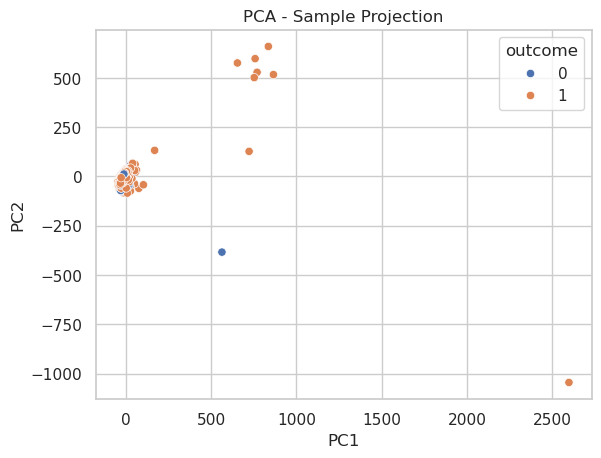

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dataset dimensions and preview
print("Integrated dataset shape:", df.shape)
print(df.head())

# Separate features and target
X = df.drop(columns=['outcome'])
y = df['outcome']

# Encode categorical 'sex' variable if present
if 'sex' in X.columns:
    X['sex'] = X['sex'].map({'M': 0, 'F': 1})

# Remove empty columns
X = X.dropna(axis=1, how='all')

# Report columns with missing values
print("Missing values per column:")
print(X.isna().sum()[X.isna().sum() > 0])

# Impute missing values with column means
X = X.fillna(X.mean(numeric_only=True))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled data shape:", X_scaled.shape)

# Check minimum number of samples before PCA
if X_scaled.shape[0] < 2:
    print("PCA not performed: at least 2 samples required.")
    print(f"Samples available: {X_scaled.shape[0]}")
else:
    # Run PCA
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)

    # Prepare PCA results for plotting
    pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
    pca_df['outcome'] = y.values

    # Plot PCA
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='outcome')
    plt.title("PCA - Sample Projection")
    plt.savefig("pca_plot.png")
    plt.show()
